# Simulation Customized Node Batch

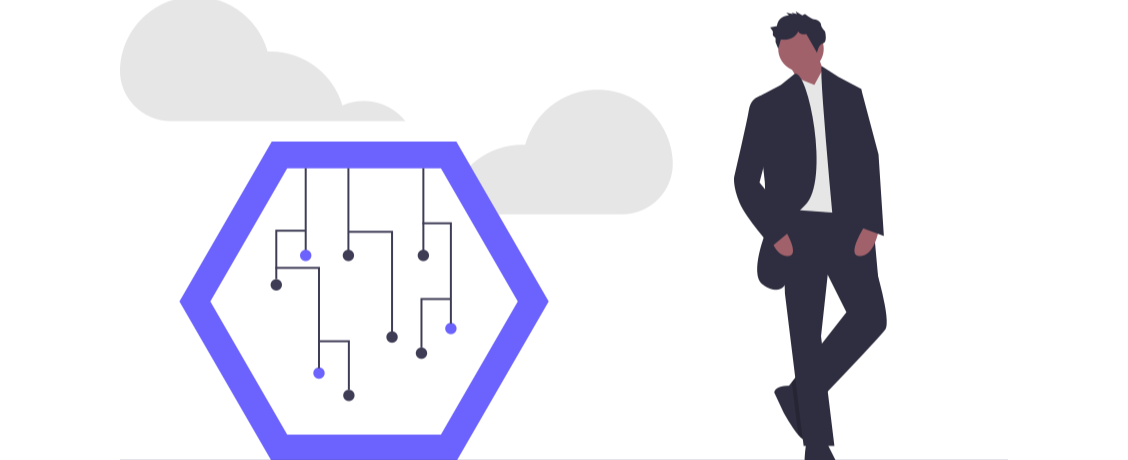

In [1]:

from lib import *

config = j.tools.tfgrid_simulator.simulator_config
startmonth = config.startmonth

config.load();

In [2]:
#parameters for simulation
# choose your hardware profile (other choices in stead of amd or supermicro or hpe)

simulation = j.tools.tfgrid_simulator.simulation_get(name="default")
nb = simulation.nodesbatch_simulate(month=startmonth)
node_normalized=nb.node_normalized
environment2 = nb.environment ;

In [3]:
if simulation.config.tft_pricing_type=="AUTO":
    C=f"""
     ## Simulation parameters used    
    
     - TFT Price auto calculated, see params valuation to change how the valuation has been calculated
     - Simulated nr of nodes in 5 years from now: {simulation.config.node_growth}
     
     ### Pricing used
     
     - CU price (4 GB men, 2 vcpu)          : {simulation.config.pricing.price_cu}
     - SU price (1 TB netto usable storage) : {simulation.config.pricing.price_su}
     - NU price (1 GB Transfer)             : {simulation.config.pricing.price_nu}
     
     ### Hardware Simulation Config
     
     - name       : {simulation.config.hardwareconfig}  
     - startmonth : {simulation.config.startmonth}  
          
     
    """
else:
    C=f"""
     ## Simulation parameters used
     
     - TFT Price over 5 year: {simulation.config.tft_price_5y}
     - Simulated nr of nodes in 5 years from now: {simulation.config.node_growth}
     
     ### Pricing used
     
     - CU price (4 GB men, 2 vcpu)          : {simulation.config.pricing.price_cu}
     - SU price (1 TB netto usable storage) : {simulation.config.pricing.price_su}
     - NU price (1 GB Transfer)             : {simulation.config.pricing.price_nu}     
     
     ### Hardware Simulation Config
     
     - name       : {simulation.config.hardwareconfig}  
     - startmonth : {simulation.config.startmonth}  
     
    """   
C=j.core.tools.text_strip(C)    
md(C)

## Simulation parameters used

- TFT Price over 5 year: 3.0
- Simulated nr of nodes in 5 years from now: 1000000

### Pricing used

- CU price (4 GB men, 2 vcpu)          : 12.0
- SU price (1 TB netto usable storage) : 10.0
- NU price (1 GB Transfer)             : 0.05     

### Hardware Simulation Config

- name       : amd_big  
- startmonth : 1  



## Environment Overview

In [4]:
md(f"""
- Hardware Investment Cost for the node batch : USD {nb.cost_hardware}
- Nr Nodes                 : {nb.nrnodes}
- ROI In Months                 : {nb.roi_months}
- the ROI after 60 months' is:  **{round(nb.roi_end,1)}**
- total amount of TFT farmed: **{nb.tft_farmed_total}**
""")


- Hardware Investment Cost for the node batch : USD 87,740
- Nr Nodes                 : 20
- ROI In Months                 : 6
- the ROI after 60 months' is:  **29.7**
- total amount of TFT farmed: **515786**


## Node Overview (= 1 server)

In [5]:
md(f"""
### Normalized Node Details

- nr of TB netto usable = {round(node_normalized.production.su,0)} TB
- nr of cpu cores = {round(node_normalized.production.cru,1)} Cores
- power used = {node_normalized.total.power} watt
- performance in passmark = {round(node_normalized.production.cu_passmark*node_normalized.production.cu)}

""")


### Normalized Node Details

- nr of TB netto usable = 44.0 TB
- nr of cpu cores = 16 Cores
- power used = 222 watt
- performance in passmark = 24479



In [6]:
nb.graph_tft(single=True)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '9738fbbb…

In [7]:
nb.graph_usd(single=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

In [8]:
nb.graph_usd(single=True,cumul=True)

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'farmed',
              'type': 'scat…

### Token price per month

In [9]:
simulation.graph_token_price()

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '3422383a-04dc-4984-80b7-2b24ec0e7991',
 …

In [10]:
simulation.graph_nr_nodes()

FigureWidget({
    'data': [{'name': 'new nodes',
              'type': 'scatter',
              'uid': 'b8d44…

## P&L Reports


In [11]:
md(nb.markdown_profit_loss(2))

# P&L report for month 2

![](https://wiki.threefold.io/img/partners_intro.png)

### nodesbatch

A nodebatch is a group of nodes which is added at a certain month during the simulation.
One batch has a nr of nodes which are added. There are 60 nodesbatches for 5 years.

- added to grid in month : 1
- nrnodes                : 20
- investment hardware    : 87k

A nodes batch helps us to simulate and see the impact of a group of nodes added at one single point of time.

### cloud units per node

- #cu                   : 31
- #su                   : 44
- #nu                   : 2,084

### simulation params in this month

- utilization           : 0.08
- price decline         : 0.01
- cu price              : 11
- su price              : 9
- nu price              : 0.05

### revenue for full batch over the 5 year

- rev cu                : 544
- rev su                : 631
- rev nu                : 150
- rev total             : 1,326

### revenue per node over the 5 year

This does not take TFT price increase in consideration, in other words revenuen is result of nr of TFT income for the farmer times the token price at that time.
If the TFT raises seriously in price then this revenue estimate is way too low.

- rev cu                : 27
- rev su                : 31
- rev nu                : 7.5
- rev total             : 66

### revenues if all resources used over 5 years.

Same remark as above, revenue calculated this way is too low.

- rev cu                : 6.8k
- rev su                : 7.9k
- rev nu                : 1,875
- rev total             : 16k

### costs for full batch over all years

- cost hardware         : 1,462
- cost power            : 95
- cost maintenance      : 146
- cost rackspace        : 504
- cost network          : 105
- cost total            : 2,313

### costs per node over all years

- cost hardware         : 73
- cost power            : 4.8
- cost maintenance      : 7.3
- cost rackspace        : 25
- cost network          : 5.3
- cost total            : 115

### profit for month 2

- margin                : -1,263
- margin 100% used      : 14k

### profit for month  2 per node

- margin                : -63
- margin 100% used      : 713

### valuation parameters

- price_cu              : 15.0
- price_su              : 10.0
- price_nu              : 0.05

### valuation report for the full batch

- valuation based on 60 months of MARGIN
- valuation total          : 839k
- valuation per node       : 41k




In [12]:
md(nb.markdown_profit_loss(60))

# P&L report for month 60

![](https://wiki.threefold.io/img/partners_intro.png)

### nodesbatch

A nodebatch is a group of nodes which is added at a certain month during the simulation.
One batch has a nr of nodes which are added. There are 60 nodesbatches for 5 years.

- added to grid in month : 1
- nrnodes                : 20
- investment hardware    : 87k

A nodes batch helps us to simulate and see the impact of a group of nodes added at one single point of time.

### cloud units per node

- #cu                   : 31
- #su                   : 44
- #nu                   : 2,084

### simulation params in this month

- utilization           : 0.9
- price decline         : 0.4
- cu price              : 8.6
- su price              : 7.1
- nu price              : 0.05

### revenue for full batch over the 5 year

- rev cu                : 3,728
- rev su                : 4.3k
- rev nu                : 1,688
- rev total             : 9.7k

### revenue per node over the 5 year

This does not take TFT price increase in consideration, in other words revenuen is result of nr of TFT income for the farmer times the token price at that time.
If the TFT raises seriously in price then this revenue estimate is way too low.

- rev cu                : 186
- rev su                : 216
- rev nu                : 84
- rev total             : 486

### revenues if all resources used over 5 years.

Same remark as above, revenue calculated this way is too low.

- rev cu                : 4.1k
- rev su                : 4.8k
- rev nu                : 1,875
- rev total             : 10k

### costs for full batch over all years

- cost hardware         : 1,462
- cost power            : 429
- cost maintenance      : 146
- cost rackspace        : 504
- cost network          : 474
- cost total            : 3,016

### costs per node over all years

- cost hardware         : 73
- cost power            : 21
- cost maintenance      : 7.3
- cost rackspace        : 25
- cost network          : 23
- cost total            : 150

### profit for month 60

- margin                : 7.1k
- margin 100% used      : 7.8k

### profit for month  60 per node

- margin                : 357
- margin 100% used      : 390

### valuation parameters

- price_cu              : 15.0
- price_su              : 10.0
- price_nu              : 0.05

### valuation report for the full batch

- valuation based on 60 months of MARGIN
- valuation total          : 493k
- valuation per node       : 24k




# Details

In [13]:
config


## threefold.simulation.config
 - name                : default
 - tft_pricing_type    : FIXED
 - tft_price_5y        : 3.00
 - node_growth         : 1,000,000
 - cloudunits_price_range: 0
 - startmonth          : 1
 - hardwareconfig      : amd_big

    ## threefold.simulation.pricing
     - price_cu            : 12.00
     - price_su            : 10.00
     - price_nu            : 0.05
    


    ## threefold.simulation.tokenomics
     - cpr_investment_usd  : 40
     - burn_percent        : 0
    


    ## threefold.simulation.network
     - nu_multiplier_from_cu: 10
     - nu_multiplier_from_su: 40
    


    ## threefold.simulation.cloudvaluation.config
     - price_cu            : 15.00
     - price_su            : 10.00
     - price_nu            : 0.05
     - revenue_months      : 30
     - margin_months       : 60
     - indextype           : MARGIN
     - tft_price_5y_baseline: 0.30
    



## Normalized Node Details

In [14]:
node_normalized


## threefold.simulation.device_or_environment
 - name                : normalized_device_amd.big
 - description         : 
 - device_template_name: normalized

    ## threefold.simulation.bom.production
     - cpr                 : 91
     - cru                 : 16
     - sru                 : 1,000
     - hru                 : 48,000
     - mru                 : 128
     - su                  : 44.17
     - cu                  : 31.75
     - nu_used_month       : 2,084
     - cu_perc             : 43.00%
     - su_perc             : 57.00%
     - cu_passmark         : 771
     - cost_nu_month       : 26.3
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 4,387
     - power               : 222
     - power_kwh_month     : 159
     - rackspace_u         : 2.10
     - cost_hardware_month : 73.1
     - cost_rack_month     : 25.2
     - cost_power_month    : 23.9
     - cost_maintenance_month: 7.311666666666666
     - cost_total_month    : 129
    


    ## threef

## Environment Details


In [15]:
environment2


## threefold.simulation.device_or_environment
 - name                : amd_big
 - description         : 
 - device_template_name: 

    ## threefold.simulation.bom.production
     - cpr                 : 1,820
     - cru                 : 320
     - sru                 : 20,000
     - hru                 : 960,000
     - mru                 : 2,560
     - su                  : 883.33
     - cu                  : 635.00
     - nu_used_month       : 41,680
     - cu_perc             : 43.00%
     - su_perc             : 57.00%
     - cu_passmark         : 15,420
     - cost_nu_month       : 526
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 87,740
     - power               : 4,440
     - power_kwh_month     : 3,184
     - rackspace_u         : 42.00
     - cost_hardware_month : 1,462
     - cost_rack_month     : 504
     - cost_power_month    : 477
     - cost_maintenance_month: 146
     - cost_total_month    : 2,590
    


    ## threefold.simulation.bom.cos

In [16]:
environment2.devices.compute


## threefold.simulation.device_or_environment
 - name                : compute
 - description         : 
 - device_template_name: amd_big

    ## threefold.simulation.bom.production
     - cpr                 : 91
     - cru                 : 16
     - sru                 : 1,000
     - hru                 : 48,000
     - mru                 : 128
     - su                  : 44.17
     - cu                  : 31.75
     - nu_used_month       : 2,084
     - cu_perc             : 43.00%
     - su_perc             : 57.00%
     - cu_passmark         : 771
     - cost_nu_month       : 26.3
    


    ## threefold.simulation.bom.total
     - cost_hardware       : 3,937
     - power               : 212
     - power_kwh_month     : 152
     - rackspace_u         : 2.00
     - cost_hardware_month : 65.6
     - cost_rack_month     : 24
     - cost_power_month    : 22.8
     - cost_maintenance_month: 6.5616666666666665
     - cost_total_month    : 118
    


    ## threefold.simulation.bom.cos

In [17]:
try:
    a= environment2.devices.storage
except:
    a=""
a

''

## Node Batch Details

In [18]:
nb.simulated_months=[]
nb


## threefold.simulation.nodesbatch
 - name                : nodesbatch_simulate_amd_big_1
 - batch_nr            : 1
 - nrnodes             : 20
 - month_start         : 1
 - months_left         : 60
 - tft_farmed_before_simulation: 0.00
 - cpr                 : 1832.19
 - cpr_improve         : 0.01

 - cost_hardware               0| 1,462|  1,462|  1,462|  1,462|  1,462|  1,462|  1,462|  1,462|  1,462|  1,462|  1,462
 - cost_maintenance            0|   146|    146|    146|    146|    146|    146|    146|    146|    146|    146|    146
 - cost_network                0|   105|    105|    105|    105|    126|    151|    177|    202|    227|    252|    278
 - cost_power                  0|    95|     95|     95|     95|    114|    137|    160|    183|    206|    229|    252
 - cost_rackspace              0|   504|    504|    504|    504|    504|    504|    504|    504|    504|    504|    504
 - cost_total                  0| 2,313|  2,313|  2,313|  2,313|  2,353|  2,401|  2,450|  2,498| 

In [26]:
i=0

print("tft_farmed, \
    tft_farmed_usd, \
    tft_farmer_income, \
    tft_farmer_income_usd, \
    tft_farmer_income_cumul, \
    tft_farmer_income_cumul_usd, \
    tft_farmer_income_usd, \
    tft_cultivated, \
    tft_cultivated_usd, \
    rev_compute, \
    rev_storage, \
    rev_network, \
    rev_compute_max, \
    rev_storage_max, \
    rev_network_max, \
    rev_total, \
    rev_total_max, \
    cost_rackspace, \
    cost_maintenance, \
    cost_hardware, \
    cost_network, \
    cost_power, \
    cost_total, \
    tft_price, \
    tft_sold, \
    tft_sold_usd, \
    roi")
#            cu,",",
#            su,",",
#            nu,",",
#            cu_price,",",
#            su_price,",",
#            nu_price)

while i<=59:
    nb.text_profit_loss(i)
    i+=1

    

tft_farmed,     tft_farmed_usd,     tft_farmer_income,     tft_farmer_income_usd,     tft_farmer_income_cumul,     tft_farmer_income_cumul_usd,     tft_farmer_income_usd,     tft_cultivated,     tft_cultivated_usd,     rev_compute,     rev_storage,     rev_network,     rev_compute_max,     rev_storage_max,     rev_network_max,     rev_total,     rev_total_max,     cost_rackspace,     cost_maintenance,     cost_hardware,     cost_network,     cost_power,     cost_total,     tft_price,     tft_sold,     tft_sold_usd,     roi
48765.87909128997 , 9753.175818257994 , 47846.21156042577 , 9569.242312085154 , 47846.21156042577 , 9569.242312085154 , 9569.242312085154 , 3336.0 , 667.2 , 274.3076857752 , 317.98572498 , 75.024 , 6857.692144379999 , 7949.643124499999 , 1875.6000000000001 , 667.3174107552001 , 16682.93526888 , 504.0 , 146.23 , 1462.3333333333333 , 105.3835061728395 , 95.52000000000001 , 2313.466839506173 , 0.2 , -4255.667530864197 , -851.1335061728395 , 0.1090636233426619
38967.4626